# Assignment 06
## Learning outcomes
This Assignment integrates knowledge and skills acquired in the last 5 Assignments – and extends it to Power analysis and Bayesian inference. The Assignment simultaneously serves as a practice for the open-book part of the midterm, which will be comparable in scope, length, and difficulty. 

In preparation for the midterm, try to solve the Assignment under time pressure and without help from co-pilot. Also practice to follow the Marking criteria:

* All figures need to have a caption that explains in a few words what the figure shows.
* All figures need to have labeled axes with units.
* All written answers need to be in English full sentences.
* You are only allowed to use the packages that are loaded in the cell below.
* Your code needs to run by itself and locally on the computer of the grader, assuming that the data file is placed in the same folder as your notebook. 
* Before submitting, restart the notebook, run all cells, to see if it runs without errors.
* Submit the notebook with all output. 

## Preliminaries
Sets up the environment by importing pandas, numpy, matplotlib, and seaborn. Because we are using plots make sure that you configure your notebook such that plots are shown inline (see Assignment 2). Preliminaries are already taken care off in the workbook. 

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import scipy.stats as ss
import pandas as pd
import numpy as np
import seaborn as sb

## Task 1: Power and Bayesian hypothesis testing (40pt)
### Question 1.1 (10pt)
For this tasks we will use the medical advisor example from Assignment 5, Task 3. You are thinking about hiring a medical advisor for a liver transplant that had 100 cases and only 5 complications. The normal base rate of complications in North America is 10%. You are trying to decide between two hypotheses: 

H0: The Consultant does not impact the complication rate (i.e. p=0.1)

H1: The Consultant halves the complication rate (i.e. p=0.05)

Write a function that generates data (using the Monte-carlo function from last assignment), either assuming tha H0 is true, or assuming that H1 is true. The function should plot an overlapped histogram of the two distributions (see lecture slides). The function should then calculate and print out the p-value and the power for a decision citerion, where you reject the Null-hypothesis for a specific number of complications (or lower). Then run the function to calculate the probability that you falsely reject the Null-hypothesis, if you use reject the Null-hypothesis when observing 5 or fewer complications. 

In [25]:
def monteCarloSim(p,N,numIter):
    """Conducts a Monte-carlo simulation for a specific number of
    coin tosses with probability p. Returns an array of number of heads for N throws.
    """
    numHeads = np.array(range(numIter),dtype = 'float64')
    for i in range(numIter):
        options = [0,1]
        probDist = [1-p,p]

        # Solution 1: use random choice and sum over hits
        a=np.random.choice(options,N,p=probDist)
        numHeads[i]=a.sum()
        # Solution 2: Use random binomial
        # numHeads[i]=np.random.binomial(N,p)
    return numHeads

def monteCarloPower(H0prob,H1prob,N,criterion):
    """
    Conducts Monte-carlo simulation under the Null and specified alternative
    Hypothesis.
    """
    # Get the two simulations
    sim0 = monteCarloSim(H0prob,N,10000)
    sim1 = monteCarloSim(H1prob,N,10000)

    # Make the plot. Add 0.5 to criterion, as we reject the Null if the
    # observed number is 7 or lower
    plt.hist(sim0,bins=range(20),align='left',alpha=0.5)
    # plt.axvline(x=criterion+0.5, color='k')
    plt.axvline(x=criterion, color='k')
    plt.hist(sim1,bins=range(20),alpha=0.5,align='left')
    plt.xlabel('Number of complications')
    plt.ylabel('Count')
    plt.xticks([0,5,10,15])

    # Evaluate the p-value and power
    pval=sum(sim0<=criterion)/len(sim0)
    power=sum(sim1<=criterion)/len(sim1)
    print(f'The p-value is = {pval:.4f}')
    print(f'The power is   = {power:.4f}')

The p-value is = 0.0560
The power is   = 0.6242


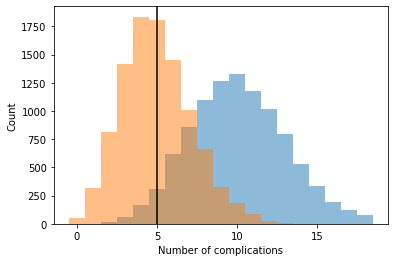

In [26]:
monteCarloPower(0.1,0.05,100,5)

*Figure 1*. The distribution under the null hypothesis (light blue) alongside the distribution under the alternative hypothesis (orange). The vertical black line shows the number of complications the consultant has had in 100 liver transplants. 

### Question 1.2 (8 pt)
According to current statistical standards (i.e., a critical p-value of 5%), would the decision to reject the Null be appropriate? How does the power calculation influence your thinking about this decision? 

> Because p>0.05, we should not reject the Null-hypothesis according to statistical standards. So we would not hire the consultant. However, the very low power of the test (only 62%) tells me that the decision may be due to the lack of evidence (cases), so we would be missing out on a opportunity with a high probability. 

### Question 1.3 ( 7 pt)
How the p-value and the power change if you decided to hire the advisor if there were 7 or less complications in 100 cases? Written answer: Would this be a better decision criterion than 5 case? 

The p-value is = 0.2060
The power is   = 0.8683


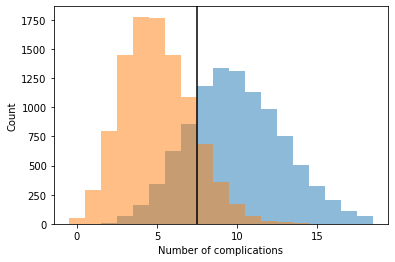

In [28]:
monteCarloPower(0.1,0.05,100,7.5)

*Figure 2*. The distribution under the null hypothesis (light blue) alongside the distribution under the alternative hypothesis (orange). The vertical black lines shows the decision criterion (7 complications in 100 cases.)

> Now I have a ~20% for a Type 1 error, but only ~15% of a Type 2 error. Under the assumption that a Type 2 error in this situation is less costly than a Type 1 error (after all, the medical advisor may not make it worse - he/she just costs money) this criterion maybe more appropriate than on of p<0.05.  

### Question 1.4 (10pt)
Write a function that again simulates data both under the H0 and H1, using similar code as in Question 1. Then calculate the Bayes-Factor BF(H1/H0). Finally report the posterior probability of the H1, assuming the prior probability was 0.5. 

In [5]:
def monteCarloBayes(H0prob,H1prob,N,observation):
    # Get the two simulations
    sim0 = monteCarloSim(H0prob,N,10000)
    sim1 = monteCarloSim(H1prob,N,10000)
    # plot the histogram
    plt.hist(sim0,bins=range(20),align='left',alpha=0.5)
    plt.axvline(x=observation, color='k')
    plt.hist(sim1,bins=range(20),alpha=0.5,align='left')
    plt.xlabel('Number of complications')
    plt.ylabel('Count')
    plt.xticks([0,5,10,15])

    # Calculate the Bayes factor:
    pYH0=sum(sim0==observation)/len(sim0) # p(observation|H0)
    pYH1=sum(sim1==observation)/len(sim1) # p(observation|H1)
    BF10 = pYH1/pYH0  # Bayes factor
    pH1 = 0.5 * pYH1 / (0.5*pYH0 + 0.5*pYH1) # Posterior probability of H1
    print(f'Bayes factor is = {BF10:.4f}')
    print(f'Posterior H1 Probability = {pH1:.4f}')

Bayes factor is = 5.2030
Posterior H1 Probability = 0.8388


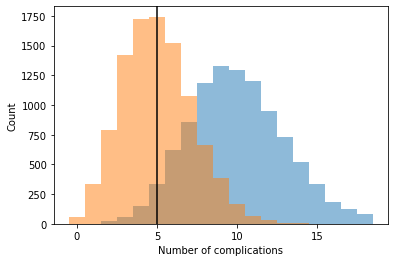

In [6]:
monteCarloBayes(0.1,0.05,100,5)

*Figure 3*. The distribution under the null hypothesis (light blue) alongside the distribution under the alternative hypothesis (orange).

### Question 1.5: (5pt)
How would you interpret the BF and the posterior probability?

The Base factor simply states that the data is 5 times more likely under the H1 than under the H0. The posterior probability quantifies the strength of the believe that H1 is true after seeing the data. It means that I should be willing to take a 500 vs. 100 dollar bet that the H1 is true. 

## Task 2: The relation between smoking and premature birth: Frequentist testing (25pt)
The data for this task come from a random sample of 150 births from the birth records in the US state of North Carolina in 2004. The data contains 50 records from mothers that self-identified as having smoked on average more than 2 cigarettes per week during the pregnancy (smokers) and 100 mothers that smoked not at all or less than 2 cigarettes per week during the pregnancy. 

The data frame has 150 observations with the following 9 variables:

- fAge: Father’s age.
- mAge: Mother’s age.
- weeks:  Weeks at which the mother gave birth.
- premature: Indicates whether the baby was premature or not.
- visits: Number of hospital visits.
- gained: Weight gained by mother (lbs) 
- weight: Birth weight of the baby (lbs) 
- sexBaby: Gender of the baby 
- smoke:  Whether or not the mother self-reported to be a smoker.

### Question 2.1 (8 pt) 
Calculate and report the mean birth weight of babies born by smoking and by non-smoking moms. Generate a violinplot of birth weight, with separate violins for smokers and non-smokers. Make sure that the two violins are plotted in the same graph, so the two groups can be directly compared. Written answer: What do you observe in terms of means and median for the two groups? Is the distribution symmetric, left-skewed, or right-skewed? 

In [7]:
D=pd.read_csv('births.csv')
D['weight'].groupby(D['smoke']).mean()

smoke
nonsmoker    7.1882
smoker       6.7166
Name: weight, dtype: float64

In [8]:
D['weight'].groupby(D['smoke']).median()

smoke
nonsmoker    7.44
smoker       6.92
Name: weight, dtype: float64

<Axes: xlabel='smoke', ylabel='weight'>

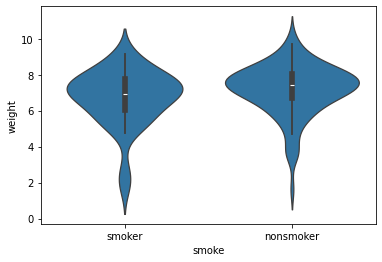

In [9]:
sb.violinplot(x = 'smoke', y = 'weight',  data = D)

*Figure 4*. Violinplots of birth weight of babies of smoker and non-smoker mothers.

> The mean birth weight for non-smokers is more than 0.4pounds larger than for smokers. The median birth weight for babies of non-smoking moms is also higher than for smokers. The distribution is moderately left-skewed with some babies being born with very low weight - these are likely the premature birth. 

### Question 2.2 (10pt)
As a researcher, you want to test the idea that smoking during pregnancy has *some influence* on the baby's birthweight. Formulate Null- and Alternative hypothesis (using =, >, <, and unequal signs). Write a function that returns the difference of the average birth weights between babies of smoker and non-smokers. Use a randomization test to test whether (and with what Type-I error) you can reject the Null-hypothesis. Do you need to use a one-sided or two-sided test? Written answer: What is your conclusion? 

> Null Hypothesis: Birthweight (smoker) = Birthweight (non-smoker) <br>
> Alt. Hypothesis: Birthweight (smoker) unequal Birthweight (non-smoker)

In [10]:
def calcMeanDiff(D):
    a=D.weight.groupby(D.smoke).mean()
    return a['nonsmoker']-a['smoker']

def randomize_column (df,colname):
    df_copy = df.copy()
    var = df_copy[colname].values
    np.random.shuffle(var)
    df_copy[colname]=var
    return df_copy

def performRandomization(D,fcn,shuffle,numIterations=500,sides=1, nbins = 10):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data
        S=randomize_column(D,shuffle)
        #2. Calculate test statistics
        listOfTS[i] = fcn(S)

    # 3. Caluclate the real test statistic
    realTS = fcn(D)
    print(f'observed difference: {realTS:.4f}')

    # 4. Plot a histogram of the
    plt.hist(listOfTS,bins= nbins)
    plt.axvline(x=realTS, color='k')
    plt.xlabel('mean difference')
    plt.ylabel('Count')

    # 5. determine p-value (one sided)
    if sides==1:
        p=sum(listOfTS>=realTS)/len(listOfTS)
    if sides==2:
        plt.axvline(x=-realTS, color='r')
        # p=sum(np.absolute(listOfTS)>=realTS)/len(listOfTS)
        p=sum(np.absolute(listOfTS)>=abs(realTS))/len(listOfTS)
    print(f'P-value of the randomisation test is p = {p:.4f}')
    return p


observed difference: 0.4716
P-value of the randomisation test is p = 0.0720


0.072

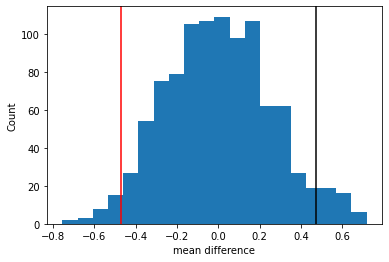

In [11]:
performRandomization(D,calcMeanDiff,'smoke',numIterations=1000,sides=2,nbins=20)

*Figure 5*. Distribution of the differences between mean of birth weight of smoker and non-smoker groups using simulation. 

> Based on the data, we cannot reject the Null-hypothesis that there are no true differences in birth weight of smokers and non-smokers.  

### Question 2.3 (7 pt)
You want to test the directed hypothesis that smoking is associated with a **lower** birth weight. Again, formulate Null and Alternative hypothesis. Use again a randomization test to see if you have evidence to reject the Null. Written answer: what is your conclusion? 

Null Hypothesis: Birthweight (smoker) >= Birthweight (non-smoker)

Alt. Hypothesis: Birthweight (smoker) < Birthweight (non-smoker)

observed difference: 0.4716
P-value of the randomisation test is p = 0.0240


0.024

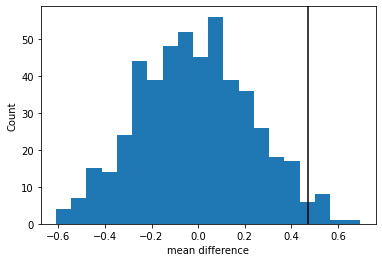

In [12]:
performRandomization(D,calcMeanDiff,'smoke',sides=1,nbins=20)

*Figure 6*. Distribution of the differences between mean of birth weight of smoker and non-smoker groups using simulation. 

> Based on a one-sided test for the directed hypothesis we can reject the hypothesis that the birth weight of babies of smokers have higher or equal birth weight to babies of non-smokers. This means there is likely a real association between smoking and lower birth rate, as this drop (or a larger drop) in weight has only a probability of less than 5% to occurr by chance. 

## Task 3: Smoke-related reduction in birth weight: Bayesian hypothesis testing (35pt)
### Question 3.1 (10pt)
Determine and report the mean and standard deviation of the mean differences in birth weight under the Null hypothesis (birth weights for smokers and non-smokers are equal) directly from the array of test statistics as obtained from the randomization test performed for Question 2.2. 

(Hint: you may have to rewrite the performRandomization function to return the list of test statistics)

In [13]:
def performRandomization(D,fcn,shuffle,numIterations=500):
    listOfTS =  np.array(range(numIterations),dtype = 'float64')
    for i in range(numIterations):
        #1. Randomly shuffle the data
        S=randomize_column(D,shuffle)
        #2. Calculate test statistics
        listOfTS[i] = fcn(S)


    return listOfTS

listTS = performRandomization(D,calcMeanDiff,'smoke')
print(f'Mean of mean differences under the Null: {listTS.mean():.4f}')
print(f'Standard deviation of mean differences under the Null: {listTS.std():.4f}')

Mean of mean differences under the Null: -0.0045
Standard deviation of mean differences under the Null: 0.2588


### Question 3.2 (10pt)
An average drop of birthweight of **0.5lbs** is considered to be clinically significant risk. Use a Bayesian hypothesis test to determine how strong the evidence is that smoking is associated with a clinically significant reduction in birth weight. Based on the shape of the distribution of the mean difference from the randomization test in Question 2.2, you decide that it is appropriate to use a normal approximation for the average weight difference, both under the H1 and H0. Further, you assume a standard error of the mean difference of 0.25lbs both for the H1 and the H0. Calculate the probability density for the real mean difference under H1 and H0. Then calculate and report the Bayes Factor of the H1 over the H0. What can you conclude from this result?  

In [14]:
se=0.25 # Standard error of mean difference
m=calcMeanDiff(D) #Mean difference
print(f'mean difference: {m:.4f}')
p0 = ss.norm.pdf(m,0,se) # Probability of data under the H0 (p(Data|H0))
print(f'probability density under H0: {p0:.4f}')
p1 = ss.norm.pdf(m,0.5,se) # Probability of the data under the H1 (p(Data|H1))
print(f'probability density under H1: {p1:.4f}')
BF = p1/p0  # Bayes factor
print(f'Bayes Factor: {BF:.4f}')

mean difference: 0.4716
probability density under H0: 0.2693
probability density under H1: 1.5855
Bayes Factor: 5.8873


> The Bayes factor of 5.88 indicates positive (but not strong) evidence that smoking is associated with a reduction of birth weight of 0.5kg. 

### Question 3.3 (7pt)
What is the posterior probability of the H1, assuming that a-priori you had the belief that there was a 70% chance that smoking may reduce the birth weight by 0.5lb.  Use the results from task 3 question 2. Show clearly the formula used to calculate the posterior probability. Written answer: What is the meaning of this posterior probability? How does the meaning differ from the p-value calculated under Task 2, Question 3? 

In [15]:
prior1 = 0.7
prior0 = 0.3
posterior1 = prior1*p1/(prior1*p1+prior0*p0)

print(f'Posterior probability of H1 (using a prior of 0.7): {posterior1:.4f}')


Posterior probability of H1 (using a prior of 0.7): 0.9321


> The posterior probability of the hypothesis that smoking is associated with a 0.5lb reduction in birthweight is 93.2%. In general, the  posterior probability is p(H1|data). Specifically, it measures our subjective belief that the H1 (rather than H0) is true, based on the fact that our prior belief (before seeing this data) was 70%. Thus, the evidence has increased our confidence in the H1 by 13%. 

> In contrast, the p-value is the probability that we had rejected the H0, assuming the H0 is true - p(reject H0|H0). While low p-values can be taken as a sign of evidence that the H1 may be true, they do NOT indicate anything about the probability of the H1 being true. 

### Question 3.4 (8pt)
A news outlet picks up your result, saying that "the study shows that smoking among US women causes an average decrease in birth weight of more than 0.4lbs." Can you draw this conclusion from the data? What are two possible problems with such claim?

> The first problem that the the newspaper claims that the results holds for US women in general. The sample is a random sample from North Carolina, rather than a random sample from the whole US population. Because it is unlikely that the relationship between smoking and birthweight depends on the geographic location (although not impossible!), this is probably the less serious problem. 
The second problem is that the newspaper makes a causal claim. Because the study is an observational study, other factor such as diet, socio-economic status, stress, etc, may have co-varied with smoking and therefore may have causes some or all of the effect on birth weight. 